In [1]:
your_local_path="D:/Prashant/LEARNING/UPX/Projects/Wine Quality data"

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns
import pandas_profiling

from collections import Counter

%matplotlib inline

C:\upx\python\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\upx\python\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\upx\python\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\upx\python\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\upx\python\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\upx\python\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\upx\python\Anac

In [3]:
wine_input=pd.read_csv(your_local_path+'/winequality.csv',delimiter=';')

In [4]:
wine_input.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
report = pandas_profiling.ProfileReport(wine_input)
report.to_file(your_local_path+'/wine_profiling.html')

In [6]:
wine_data =  pd.DataFrame.drop_duplicates(wine_input).reset_index(drop=True)

In [7]:
report = pandas_profiling.ProfileReport(wine_data)
report.to_file(your_local_path+'/wine_profiling_clean.html')

In [8]:
def detect_outliers(df,n,features):
    outlier_indices=[]
    for col in features:
        Q3=df[col].quantile(.75)
        Q1=df[col].quantile(.25)
        IQR=Q3-Q1
        
        outlier_range = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_range) | (df[col] > Q3 + outlier_range )].index
        
        
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    print(multiple_outliers)
    
    return multiple_outliers

In [9]:
Outliers_to_drop = detect_outliers(wine_data,2,["alcohol","density","residual sugar"])

[948]


In [10]:
wine_data.iloc[940:950]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
940,8.2,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3,6
941,9.1,0.30,0.41,2.0,0.068,10.0,24.0,0.99523,3.27,0.85,11.7,7
942,8.1,0.78,0.10,3.3,0.090,4.0,13.0,0.99855,3.36,0.49,9.5,5
943,10.8,0.47,0.43,2.1,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
944,8.3,0.53,0.00,1.4,0.070,6.0,14.0,0.99593,3.25,0.64,10.0,6
945,5.4,0.42,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.3,7
946,7.9,0.33,0.41,1.5,0.056,6.0,35.0,0.99396,3.29,0.71,11.0,6
947,8.9,0.24,0.39,1.6,0.074,3.0,10.0,0.99698,3.12,0.59,9.5,6
948,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.6,6
949,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,6


In [11]:
def transform_quality(quality):
    if(quality < 5 ):
        quality='Poor'
    elif(quality < 7 ):
        quality='Average'
    else:
        quality='Excellent'
    return quality

In [12]:
wine_data['qualityClass']=wine_data['quality'].transform(transform_quality)

In [13]:
report = pandas_profiling.ProfileReport(wine_data)
report.to_file(your_local_path+'/wine_profiling_Transformed.html')

In [14]:
class_Quality=pd.get_dummies(wine_data['qualityClass'],prefix='quality')
wine_data = pd.concat([wine_data,class_Quality],axis=1)

In [15]:
#wine_data.drop(labels='quality', axis=1, inplace=True, errors='raise')

In [16]:
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualityClass,quality_Average,quality_Excellent,quality_Poor
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Average,1,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Average,1,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Average,1,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Average,1,0,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Average,1,0,0


In [56]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 17 columns):
fixed acidity           1359 non-null float64
volatile acidity        1359 non-null float64
citric acid             1359 non-null float64
residual sugar          1359 non-null float64
chlorides               1359 non-null float64
free sulfur dioxide     1359 non-null float64
total sulfur dioxide    1359 non-null float64
density                 1359 non-null float64
pH                      1359 non-null float64
sulphates               1359 non-null float64
alcohol                 1359 non-null float64
quality                 1359 non-null int64
qualityClass            1359 non-null object
quality_Average         1359 non-null uint8
quality_Excellent       1359 non-null uint8
quality_Poor            1359 non-null uint8
qualityType             1359 non-null int64
dtypes: float64(11), int64(2), object(1), uint8(3)
memory usage: 152.7+ KB


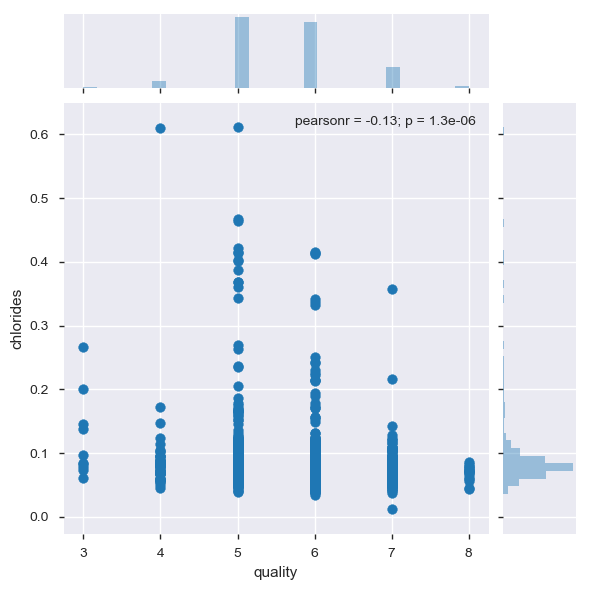

In [17]:

sns.jointplot(x="quality", y="chlorides", data=wine_data)

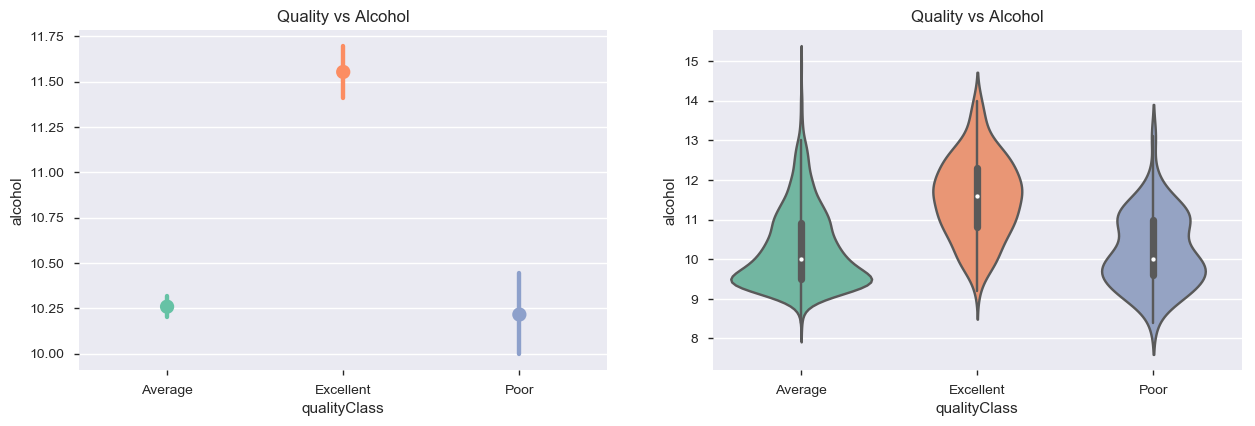

In [18]:
plt.figure(0,figsize=(15,15))

plt.subplot(321)
sns.pointplot(x="qualityClass", y="alcohol",  data=wine_data, palette="Set2")
plt.title('Quality vs Alcohol')

plt.subplot(322)
sns.violinplot(x="qualityClass", y="alcohol",  data=wine_data, palette="Set2")
plt.title('Quality vs Alcohol')


plt.show()

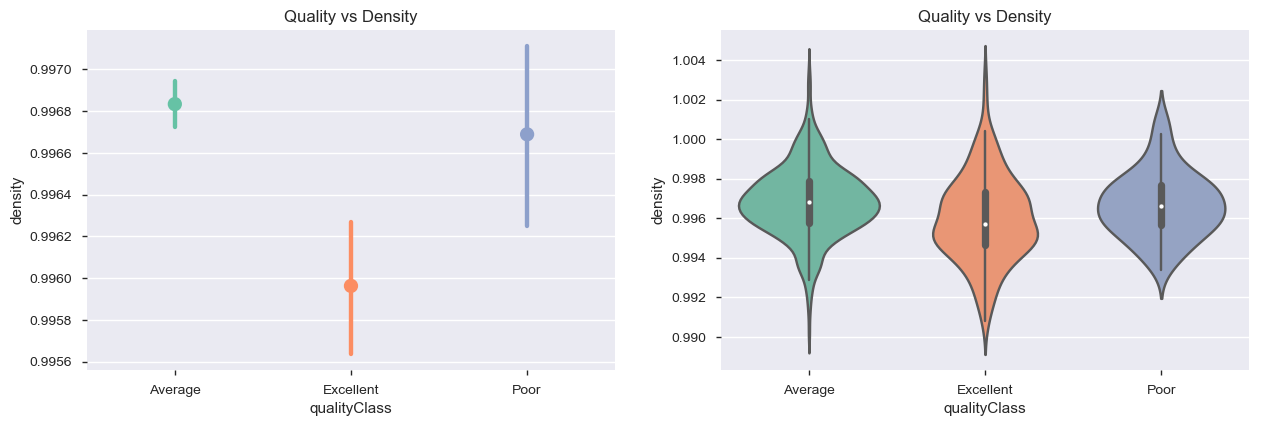

In [19]:
plt.figure(0,figsize=(15,15))

plt.subplot(321)
sns.pointplot(x="qualityClass", y="density",  data=wine_data, palette="Set2")
plt.title('Quality vs Density')

plt.subplot(322)
sns.violinplot(x="qualityClass", y="density",  data=wine_data, palette="Set2")
plt.title('Quality vs Density')

plt.show()

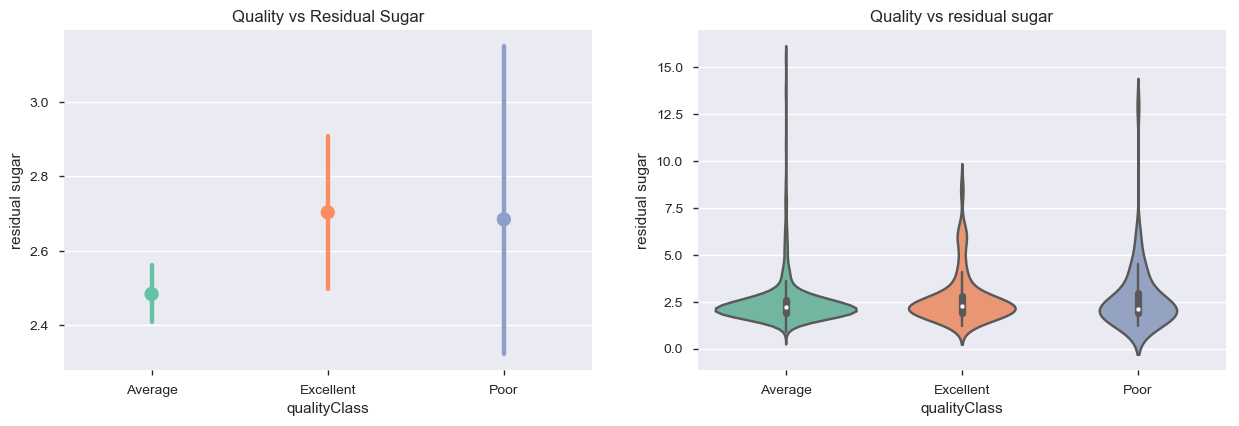

In [20]:
plt.figure(0,figsize=(15,15))

plt.subplot(321)
sns.pointplot(x="qualityClass", y="residual sugar",  data=wine_data, palette="Set2")
plt.title('Quality vs Residual Sugar')

plt.subplot(322)
sns.violinplot(x="qualityClass", y="residual sugar",  data=wine_data, palette="Set2")
plt.title('Quality vs residual sugar')

plt.show()

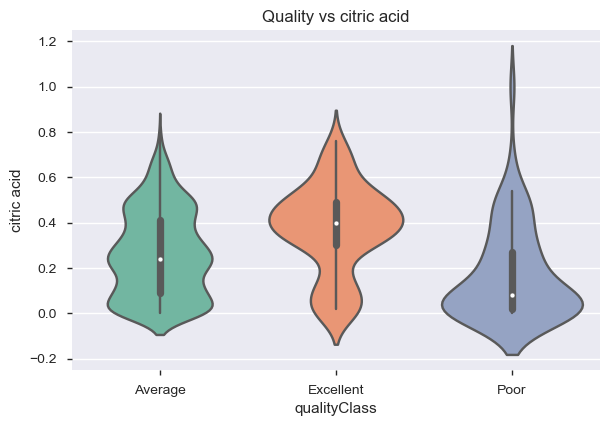

In [63]:
plt.figure(0,figsize=(15,15))

plt.subplot(322)
sns.violinplot(x="qualityClass", y="citric acid",  data=wine_data, palette="Set2")
plt.title('Quality vs citric acid')

plt.show()

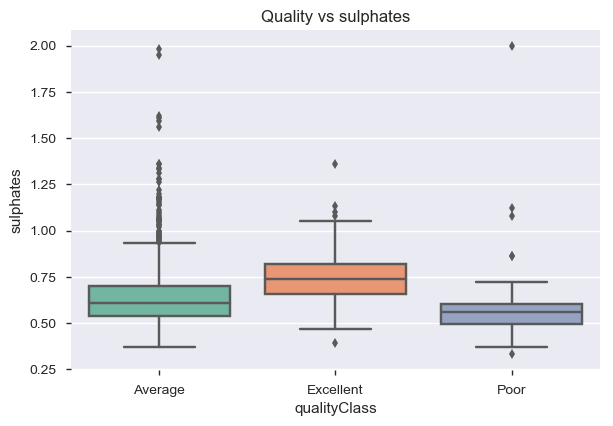

In [65]:
plt.figure(0,figsize=(15,15))

plt.subplot(322)
sns.boxplot(x="qualityClass", y="sulphates",  data=wine_data, palette="Set2")
plt.title('Quality vs sulphates')

plt.show()

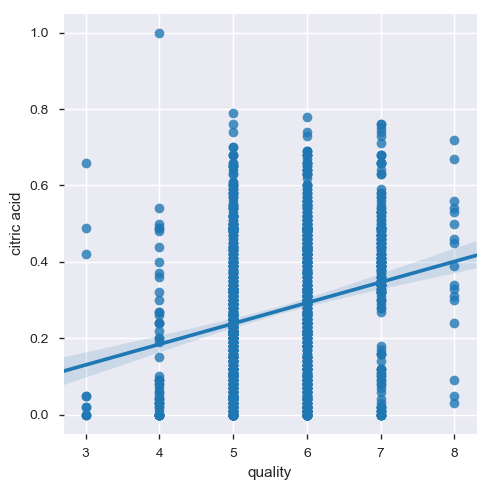

In [62]:
sns.lmplot(x='quality', y='citric acid', data=wine_data, fit_reg=True)

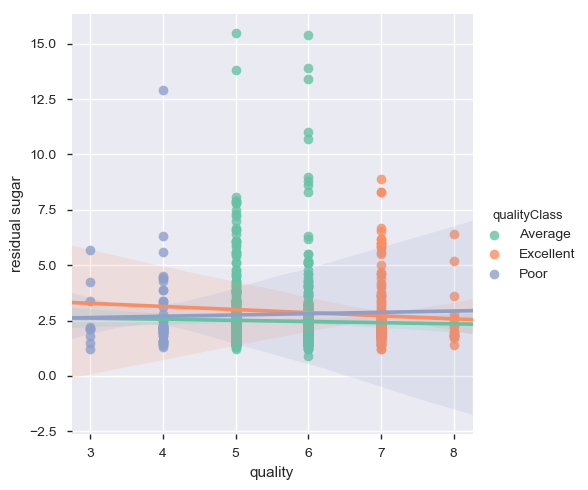

In [21]:
mx = sns.lmplot(x="quality", y="residual sugar", data=wine_data,hue="qualityClass",palette='Set2')


[]

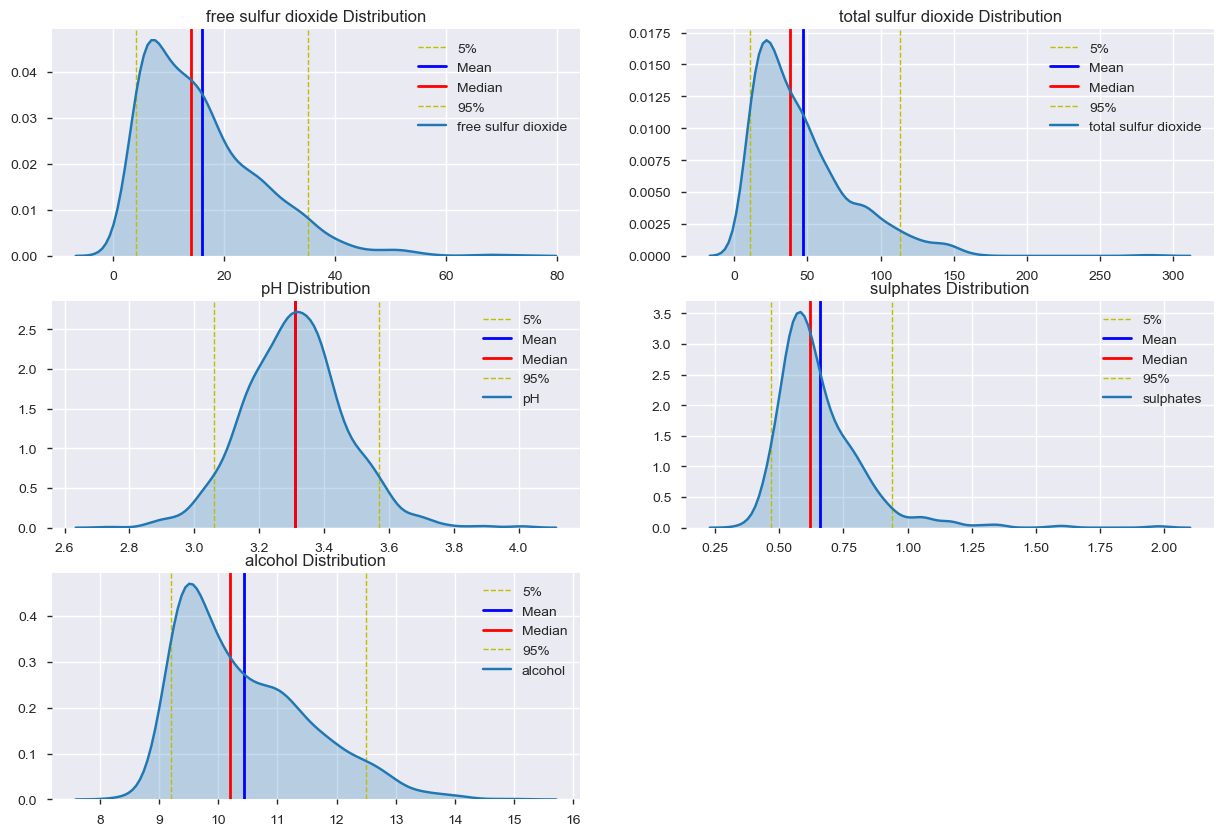

In [22]:
plt.figure(0,figsize=(15,5)).set_figheight(10)

plt.subplot(321)
x10_pct = np.percentile(wine_data['free sulfur dioxide'], 5.0)
x90_pct = np.percentile(wine_data['free sulfur dioxide'], 95.0)
xMean = np.mean(wine_data['free sulfur dioxide'])
xMedian = np.median(wine_data['free sulfur dioxide'])
plt.axvline(x=x10_pct, linewidth=1, color = 'y',linestyle = '--',label='5%')
plt.axvline(x=xMean, linewidth=2, color = 'b',linestyle = '-',label='Mean')
plt.axvline(x=xMedian, linewidth=2, color = 'r',linestyle = '-',label='Median')
plt.axvline(x=x90_pct, linewidth=1, color = 'y',linestyle = '--',label='95%')
sns.kdeplot(wine_data['free sulfur dioxide'], shade=True)
plt.title('free sulfur dioxide Distribution')

plt.subplot(322)
x10_pct = np.percentile(wine_data['total sulfur dioxide'], 5.0)
x90_pct = np.percentile(wine_data['total sulfur dioxide'], 95.0)
xMean = np.mean(wine_data['total sulfur dioxide'])
xMedian = np.median(wine_data['total sulfur dioxide'])
plt.axvline(x=x10_pct, linewidth=1, color = 'y',linestyle = '--',label='5%')
plt.axvline(x=xMean, linewidth=2, color = 'b',linestyle = '-',label='Mean')
plt.axvline(x=xMedian, linewidth=2, color = 'r',linestyle = '-',label='Median')
plt.axvline(x=x90_pct, linewidth=1, color = 'y',linestyle = '--',label='95%')
sns.kdeplot(wine_data['total sulfur dioxide'], shade=True)
plt.title('total sulfur dioxide Distribution')

plt.subplot(323)
x10_pct = np.percentile(wine_data['pH'], 5.0)
x90_pct = np.percentile(wine_data['pH'], 95.0)
xMean = np.mean(wine_data['pH'])
xMedian = np.median(wine_data['pH'])
plt.axvline(x=x10_pct, linewidth=1, color = 'y',linestyle = '--',label='5%')
plt.axvline(x=xMean, linewidth=2, color = 'b',linestyle = '-',label='Mean')
plt.axvline(x=xMedian, linewidth=2, color = 'r',linestyle = '-',label='Median')
plt.axvline(x=x90_pct, linewidth=1, color = 'y',linestyle = '--',label='95%')
sns.kdeplot(wine_data['pH'], shade=True)
plt.title('pH Distribution')

plt.subplot(324)
x10_pct = np.percentile(wine_data['sulphates'], 5.0)
x90_pct = np.percentile(wine_data['sulphates'], 95.0)
xMean = np.mean(wine_data['sulphates'])
xMedian = np.median(wine_data['sulphates'])
plt.axvline(x=x10_pct, linewidth=1, color = 'y',linestyle = '--',label='5%')
plt.axvline(x=xMean, linewidth=2, color = 'b',linestyle = '-',label='Mean')
plt.axvline(x=xMedian, linewidth=2, color = 'r',linestyle = '-',label='Median')
plt.axvline(x=x90_pct, linewidth=1, color = 'y',linestyle = '--',label='95%')
sns.kdeplot(wine_data['sulphates'], shade=True)
plt.title('sulphates Distribution')

plt.subplot(325)
x10_pct = np.percentile(wine_data['alcohol'], 5.0)
x90_pct = np.percentile(wine_data['alcohol'], 95.0)
xMean = np.mean(wine_data['alcohol'])
xMedian = np.median(wine_data['alcohol'])
plt.axvline(x=x10_pct, linewidth=1, color = 'y',linestyle = '--',label='5%')
plt.axvline(x=xMean, linewidth=2, color = 'b',linestyle = '-',label='Mean')
plt.axvline(x=xMedian, linewidth=2, color = 'r',linestyle = '-',label='Median')
plt.axvline(x=x90_pct, linewidth=1, color = 'y',linestyle = '--',label='95%')
sns.kdeplot(wine_data['alcohol'], shade=True)
plt.title('alcohol Distribution')


plt.plot()

[]

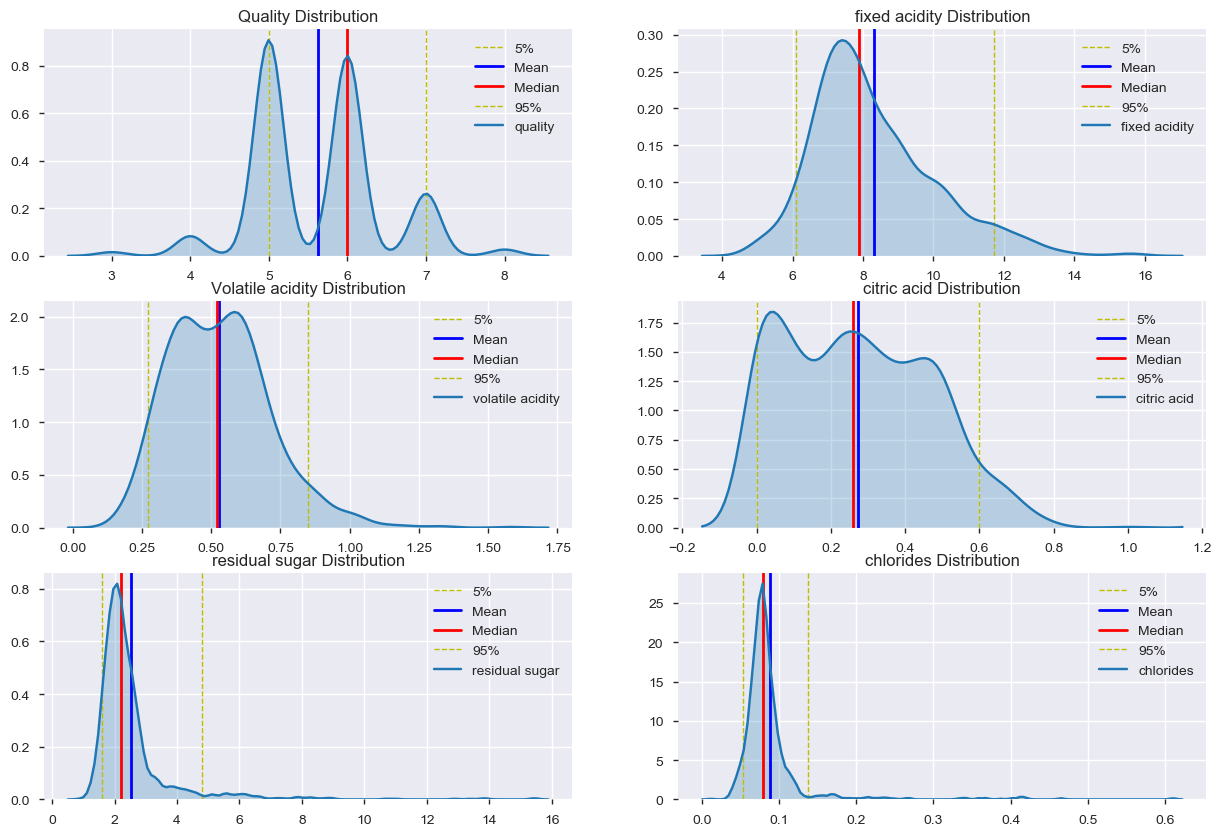

In [23]:
plt.figure(0,figsize=(15,5)).set_figheight(10)

plt.subplot(321)
x10_pct = np.percentile(wine_data['quality'], 5.0)
x90_pct = np.percentile(wine_data['quality'], 95.0)
xMean = np.mean(wine_data['quality'])
xMedian = np.median(wine_data['quality'])
plt.axvline(x=x10_pct, linewidth=1, color = 'y',linestyle = '--',label='5%')
plt.axvline(x=xMean, linewidth=2, color = 'b',linestyle = '-',label='Mean')
plt.axvline(x=xMedian, linewidth=2, color = 'r',linestyle = '-',label='Median')
plt.axvline(x=x90_pct, linewidth=1, color = 'y',linestyle = '--',label='95%')
sns.kdeplot(wine_data.quality, shade=True)
plt.title('Quality Distribution')

plt.subplot(322)
x10_pct = np.percentile(wine_data['fixed acidity'], 5.0)
x90_pct = np.percentile(wine_data['fixed acidity'], 95.0)
xMean = np.mean(wine_data['fixed acidity'])
xMedian = np.median(wine_data['fixed acidity'])
plt.axvline(x=x10_pct, linewidth=1, color = 'y',linestyle = '--',label='5%')
plt.axvline(x=xMean, linewidth=2, color = 'b',linestyle = '-',label='Mean')
plt.axvline(x=xMedian, linewidth=2, color = 'r',linestyle = '-',label='Median')
plt.axvline(x=x90_pct, linewidth=1, color = 'y',linestyle = '--',label='95%')
sns.kdeplot(wine_data['fixed acidity'], shade=True)
plt.title('fixed acidity Distribution')

plt.subplot(323)
x10_pct = np.percentile(wine_data['volatile acidity'], 5.0)
x90_pct = np.percentile(wine_data['volatile acidity'], 95.0)
xMean = np.mean(wine_data['volatile acidity'])
xMedian = np.median(wine_data['volatile acidity'])
plt.axvline(x=x10_pct, linewidth=1, color = 'y',linestyle = '--',label='5%')
plt.axvline(x=xMean, linewidth=2, color = 'b',linestyle = '-',label='Mean')
plt.axvline(x=xMedian, linewidth=2, color = 'r',linestyle = '-',label='Median')
plt.axvline(x=x90_pct, linewidth=1, color = 'y',linestyle = '--',label='95%')
sns.kdeplot(wine_data['volatile acidity'], shade=True)
plt.title('Volatile acidity Distribution')

plt.subplot(324)
x10_pct = np.percentile(wine_data['citric acid'], 5.0)
x90_pct = np.percentile(wine_data['citric acid'], 95.0)
xMean = np.mean(wine_data['citric acid'])
xMedian = np.median(wine_data['citric acid'])
plt.axvline(x=x10_pct, linewidth=1, color = 'y',linestyle = '--',label='5%')
plt.axvline(x=xMean, linewidth=2, color = 'b',linestyle = '-',label='Mean')
plt.axvline(x=xMedian, linewidth=2, color = 'r',linestyle = '-',label='Median')
plt.axvline(x=x90_pct, linewidth=1, color = 'y',linestyle = '--',label='95%')
sns.kdeplot(wine_data['citric acid'], shade=True)
plt.title('citric acid Distribution')

plt.subplot(325)
x10_pct = np.percentile(wine_data['residual sugar'], 5.0)
x90_pct = np.percentile(wine_data['residual sugar'], 95.0)
xMean = np.mean(wine_data['residual sugar'])
xMedian = np.median(wine_data['residual sugar'])
plt.axvline(x=x10_pct, linewidth=1, color = 'y',linestyle = '--',label='5%')
plt.axvline(x=xMean, linewidth=2, color = 'b',linestyle = '-',label='Mean')
plt.axvline(x=xMedian, linewidth=2, color = 'r',linestyle = '-',label='Median')
plt.axvline(x=x90_pct, linewidth=1, color = 'y',linestyle = '--',label='95%')
sns.kdeplot(wine_data['residual sugar'], shade=True)
plt.title('residual sugar Distribution')

plt.subplot(326)
x10_pct = np.percentile(wine_data['chlorides'], 5.0)
x90_pct = np.percentile(wine_data['chlorides'], 95.0)
xMean = np.mean(wine_data['chlorides'])
xMedian = np.median(wine_data['chlorides'])
plt.axvline(x=x10_pct, linewidth=1, color = 'y',linestyle = '--',label='5%')
plt.axvline(x=xMean, linewidth=2, color = 'b',linestyle = '-',label='Mean')
plt.axvline(x=xMedian, linewidth=2, color = 'r',linestyle = '-',label='Median')
plt.axvline(x=x90_pct, linewidth=1, color = 'y',linestyle = '--',label='95%')
sns.kdeplot(wine_data['chlorides'], shade=True)
plt.title('chlorides Distribution')


plt.plot()

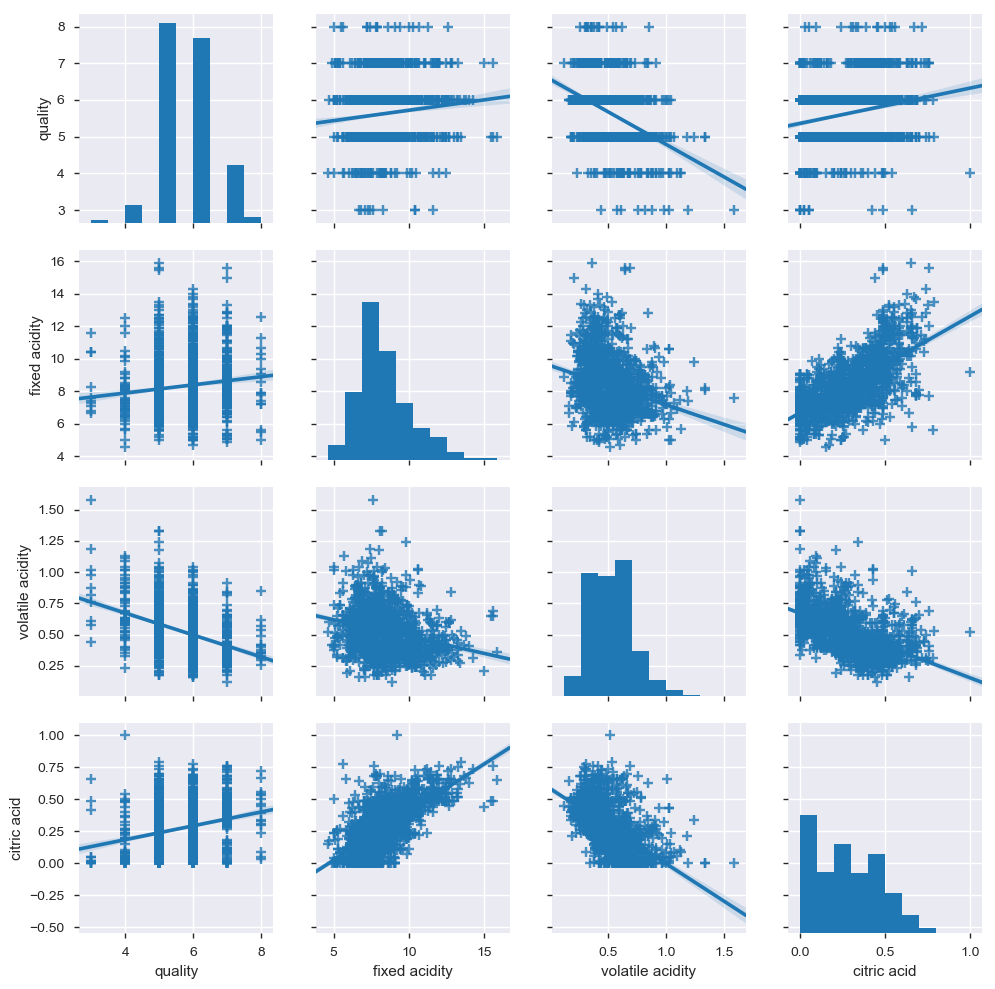

In [24]:
sns.pairplot(wine_data,vars=['quality' ,'fixed acidity' ,'volatile acidity' ,'citric acid'],kind="reg", markers="+", 
             plot_kws=dict(  ))

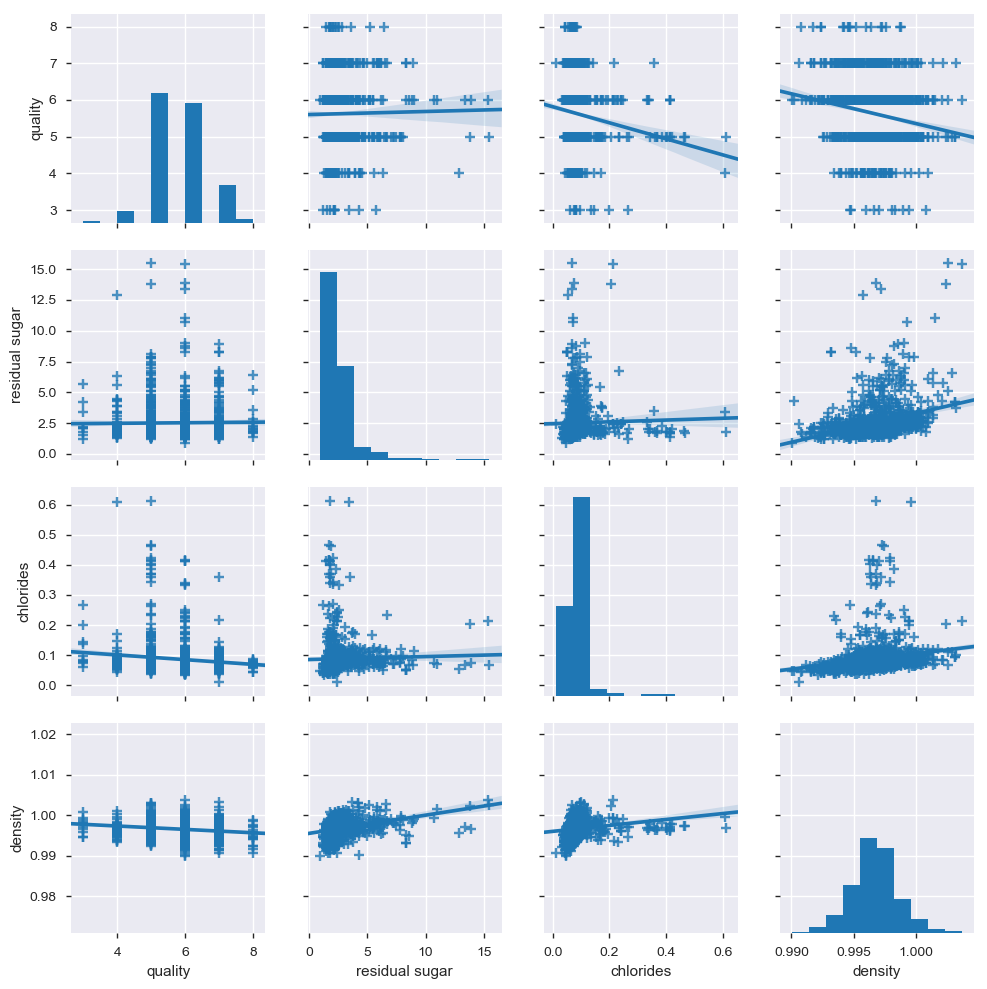

In [25]:
sns.pairplot(wine_data,vars=['quality' ,'residual sugar' ,'chlorides' ,'density'],kind="reg", markers="+", palette="Set2")

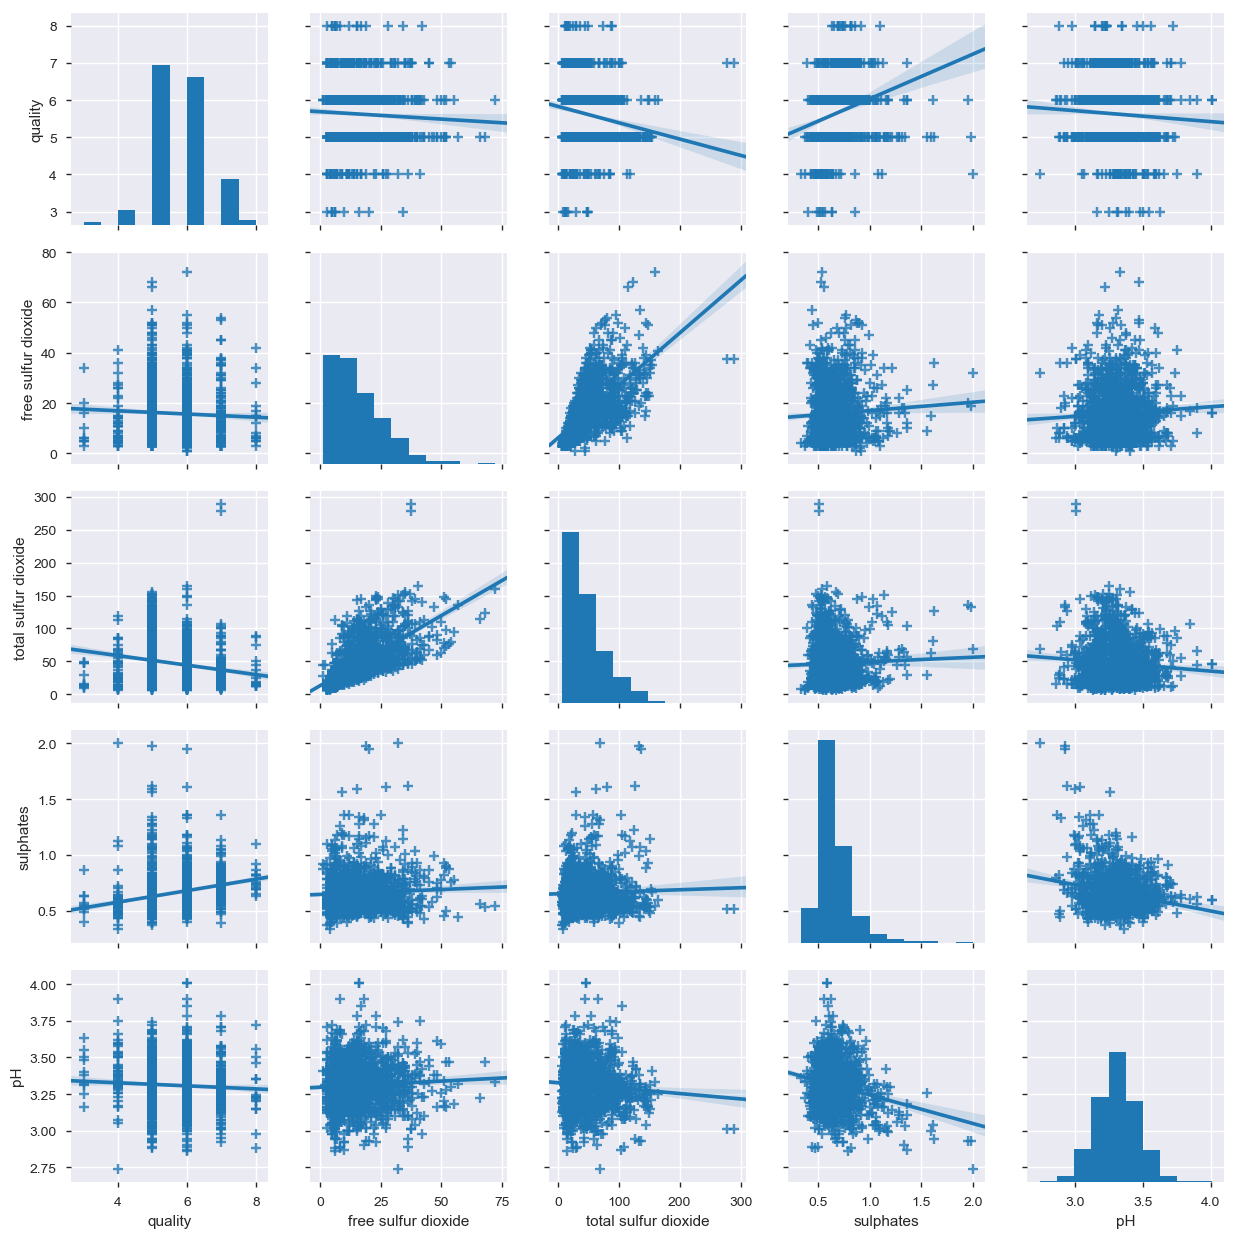

In [48]:
sns.pairplot(wine_data,vars=['quality' ,'free sulfur dioxide' ,'total sulfur dioxide' ,'sulphates','pH'],kind="reg", markers="+", palette="Set2")

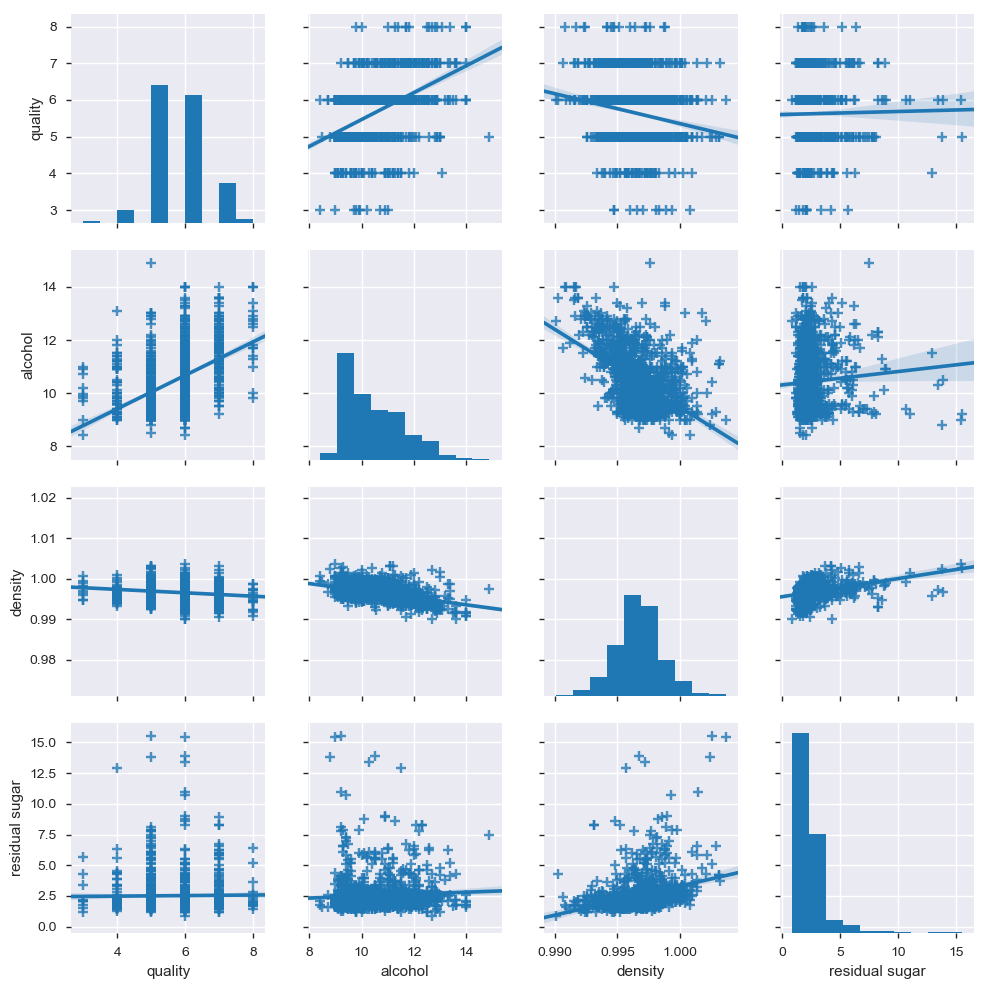

In [27]:
sns.pairplot(wine_data,vars=['quality' ,'alcohol' ,'density' ,'residual sugar'],kind="reg", markers="+", palette="Set2")

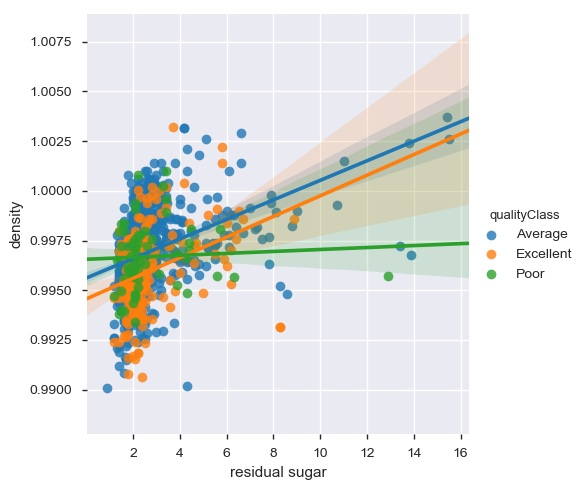

In [28]:
sns.lmplot('residual sugar', 'density', data=wine_data, fit_reg=True, hue="qualityClass")

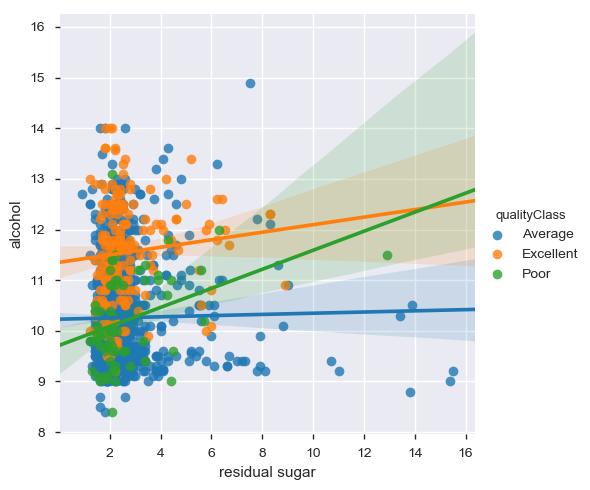

In [29]:
sns.lmplot('residual sugar', 'alcohol', data=wine_data, fit_reg=True, hue="qualityClass")

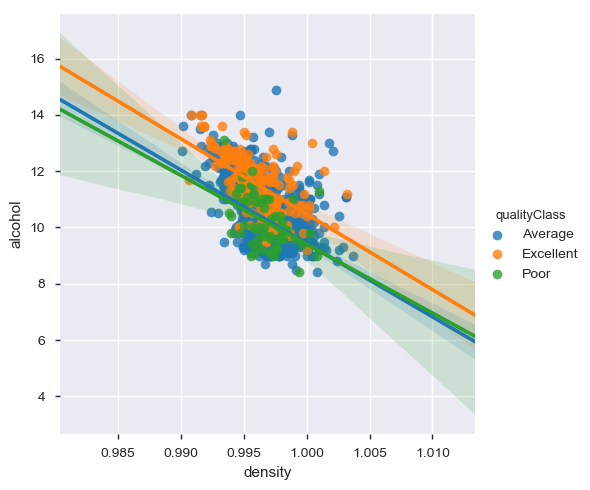

In [30]:
sns.lmplot('density', 'alcohol', data=wine_data, fit_reg=True, hue="qualityClass")

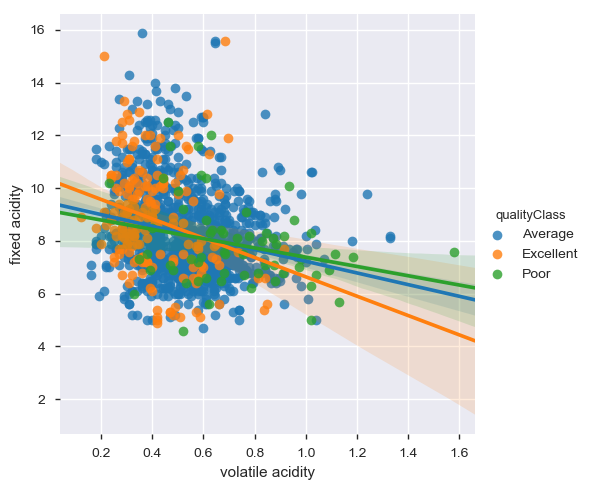

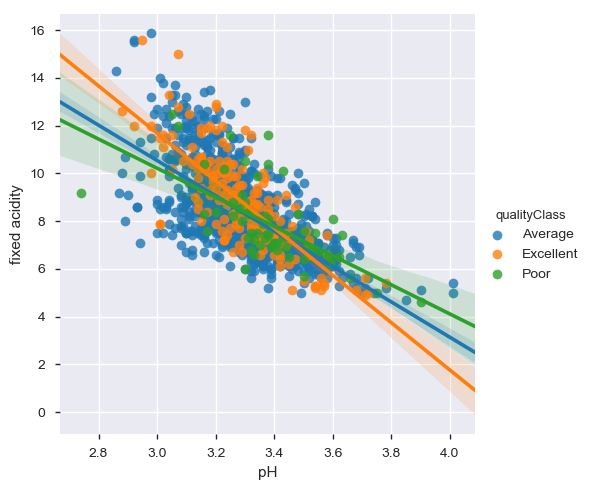

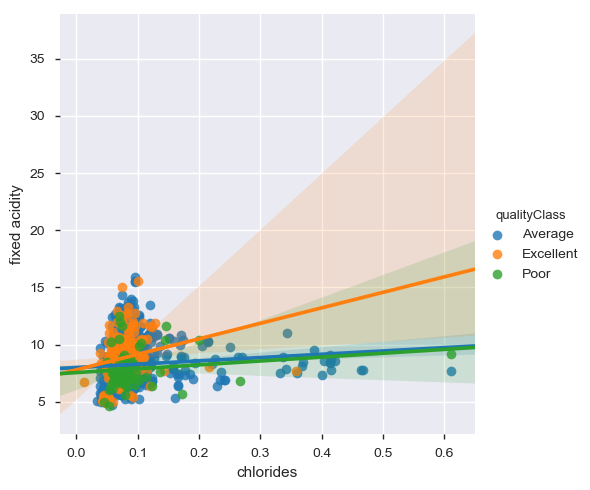

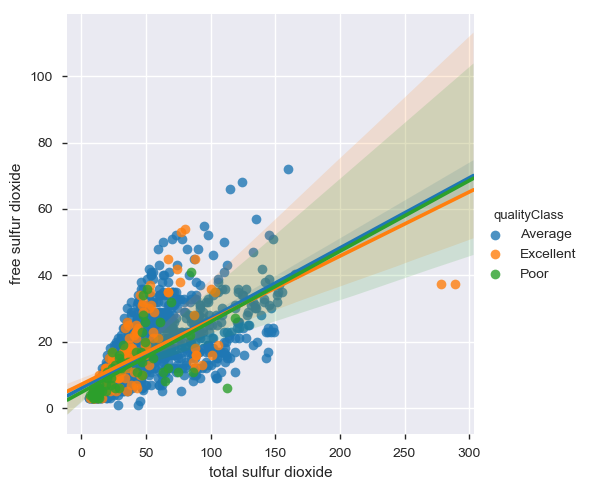

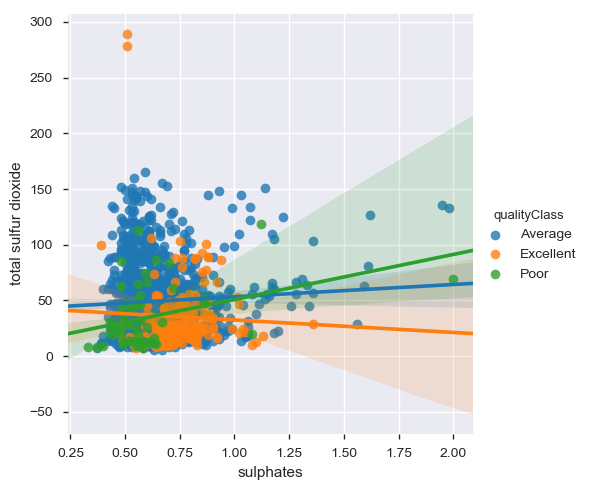

In [31]:
plt.figure(figsize=(15,15))

sns.lmplot('volatile acidity', 'fixed acidity', data=wine_data, fit_reg=True, hue="qualityClass")

sns.lmplot('pH', 'fixed acidity', data=wine_data, fit_reg=True, hue="qualityClass")

sns.lmplot('chlorides', 'fixed acidity', data=wine_data, fit_reg=True, hue="qualityClass")

sns.lmplot('total sulfur dioxide', 'free sulfur dioxide', data=wine_data, fit_reg=True, hue="qualityClass")

sns.lmplot('sulphates', 'total sulfur dioxide', data=wine_data, fit_reg=True, hue="qualityClass")

plt.show()

In [32]:
wine_data_grp = wine_data

In [36]:
def qualityType(qualityClass):
    
    if qualityClass == 'Poor':
        return 0
    elif qualityClass == 'Average':
        return 1    
    else:
        return 2
wine_data_grp['qualityType'] = wine_data_grp['qualityClass'].apply(qualityType)

In [38]:
wine_data_grp.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualityClass,quality_Average,quality_Excellent,quality_Poor,qualityType
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Average,1,0,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Average,1,0,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Average,1,0,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Average,1,0,0,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Average,1,0,0,1


In [51]:
wine_data_grp1=wine_data_grp.groupby('qualityClass').median()

In [52]:
wine_data_grp1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_Average,quality_Excellent,quality_Poor,qualityType
qualityClass,,,,,,,,,,,,,,,,
Average,7.8,0.535,0.24,2.2,0.0800,15.0,41.0,0.9968,3.31,0.61,10.0,5,1,0,0,1
Excellent,8.7,0.370,0.40,2.3,0.0715,11.0,26.5,0.9957,3.27,0.74,11.6,7,0,1,0,2
Poor,7.5,0.680,0.08,2.1,0.0800,9.0,26.0,0.9966,3.38,0.56,10.0,4,0,0,1,0


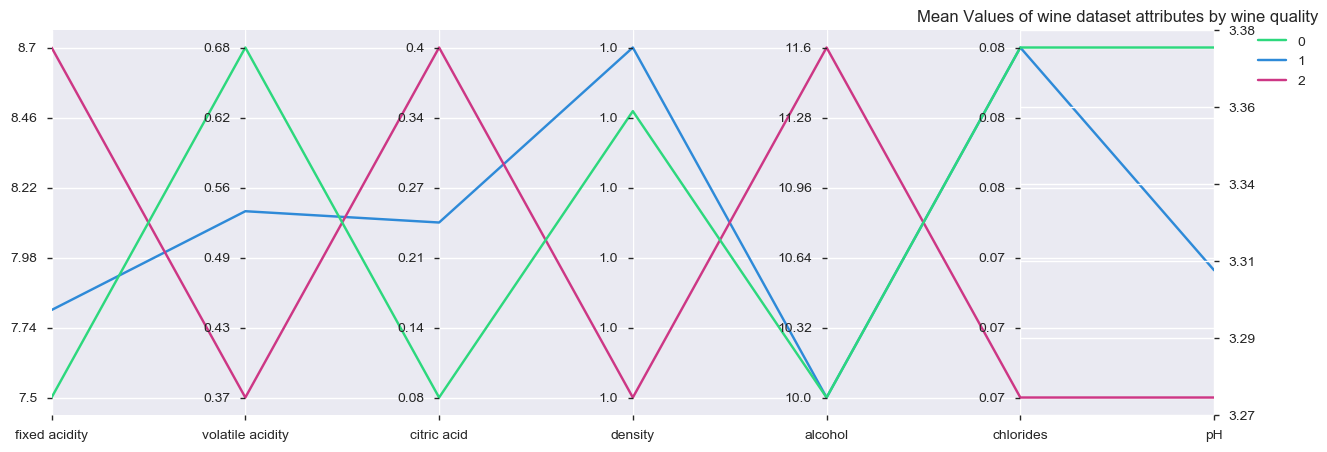

In [53]:
from matplotlib import ticker
df=wine_data_grp1
wine_data_grp1['qualityClassCat']= wine_data_grp1['qualityType'].astype('category')
cols = [ 'fixed acidity', 'volatile acidity', 'citric acid', 'density','alcohol','chlorides','pH']
x = [i for i, _ in enumerate(cols)]
colours = ['#2dd87d','#2e8ad8','#cd3785']

# create dict of categories: colours
colours = {df['qualityClassCat'].cat.categories[i]: colours[i] for i, _ in enumerate(df['qualityClassCat'].cat.categories)}

# Create (X-1) sublots along x axis
fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(15,5))

# Get min, max and range for each column
# Normalize the data for each column
min_max_range = {}
for col in cols:
    min_max_range[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
    df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))

# Plot each row
for i, ax in enumerate(axes):
    for idx in df.index:
        survival_category = df.loc[idx, 'qualityClassCat']
        ax.plot(x, df.loc[idx, cols], colours[survival_category])
    ax.set_xlim([x[i], x[i+1]])
    
# Set the tick positions and labels on y axis for each plot
# Tick positions based on normalised data
# Tick labels are based on original data
def set_ticks_for_axis(dim, ax, ticks):
    min_val, max_val, val_range = min_max_range[cols[dim]]
    step = val_range / float(ticks-1)
    tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
    norm_min = df[cols[dim]].min()
    norm_range = np.ptp(df[cols[dim]])
    norm_step = norm_range / float(ticks-1)
    ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
    ax.yaxis.set_ticks(ticks)
    ax.set_yticklabels(tick_labels)

for dim, ax in enumerate(axes):
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    set_ticks_for_axis(dim, ax, ticks=6)
    ax.set_xticklabels([cols[dim]])
    

# Move the final axis' ticks to the right-hand side
ax = plt.twinx(axes[-1])
dim = len(axes)
ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
set_ticks_for_axis(dim, ax, ticks=6)
ax.set_xticklabels([cols[-2], cols[-1]])


# Remove space between subplots
plt.subplots_adjust(wspace=0)

# Add legend to plot
plt.legend(
    [plt.Line2D((0,1),(0,0), color=colours[cat]) for cat in df['qualityClassCat'].cat.categories],
    df['qualityClassCat'].cat.categories,
    bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)

plt.title("Mean Values of wine dataset attributes by wine quality")

plt.show()

In [ ]:
df['Excellent'].cat.categories[i]: colours[i] for i, _ in enumerate(df['Excellent'].cat.categories)